In [1]:
import fastai
import pandas as pd
from fastai.utils.show_install import *
show_install()



```text
=== Software === 
python        : 3.7.1
fastai        : 1.0.42
fastprogress  : 0.1.18
torch         : 1.0.1
nvidia driver : 410.79
torch cuda    : 10.0.130 / is available
torch cudnn   : 7402 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 8119MB | Quadro P4000

=== Environment === 
platform      : Linux-4.4.0-142-generic-x86_64-with-debian-stretch-sid
distro        : #168-Ubuntu SMP Wed Jan 16 21:00:45 UTC 2019
conda env     : fastai
python        : /home/paperspace/anaconda3/envs/fastai/bin/python
sys.path      : /home/paperspace/fastai/nbs
/home/paperspace/anaconda3/envs/fastai/lib/python37.zip
/home/paperspace/anaconda3/envs/fastai/lib/python3.7
/home/paperspace/anaconda3/envs/fastai/lib/python3.7/lib-dynload

/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages
/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/IPython/extensions
/home/paperspace/.ipython
```

Please make sure to include opening/closing ``

In [6]:
#!pip install numpy scipy scikit-learn
#!pip install networkx
#!pip install seaborn

In [7]:
node_mappings = [{
        0:       "C",
        1:       "O",
        2:       "N",
        3:       "Cl",
        4:       "F",
        5:       "S",
        6:       "Se",
        7:       "P",
        8:       "Na",
        9:       "I",
        10:      "Co",
        11:      "Br",
        12:      "Li",
        13:      "Si",
        14:      "Mg",
        15:      "Cu",
        16:      "As",
        17:      "B",
        18:      "Pt",
        19:      "Ru",
        20:      "K",
        21:      "Pd",
        22:      "Au",
        23:      "Te",
        24:      "W",
        25:      "Rh",
        26:      "Zn",
        27:      "Bi",
        28:      "Pb",
        29:      "Ge",
        30:      "Sb",
        31:      "Sn",
        32:      "Ga",
        33:      "Hg",
        34:      "Ho",
        35:      "Tl",
        36:      "Ni",
        37:      "Tb"
}]



In [8]:
from utilities import load_graph_kernel_graph, load_graph_kernel_labels

label_maps = {"node_labels": node_mappings}
a = load_graph_kernel_graph("./AIDS", mappings =label_maps )
y = load_graph_kernel_labels("./AIDS")


Added node_labels[0]; current_vocab_size = 39
Added edge_labels; current_vocab_size = 43


/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)


Added node_attributes[attr_0]; current_vocab_size = 50
Added node_attributes[attr_1]; current_vocab_size = 56
Added node_attributes[attr_2]; current_vocab_size = 63
Added node_attributes[attr_3]; current_vocab_size = 70


In [9]:
from module import get_structural_signatures, walk_as_string

In [10]:
b = get_structural_signatures(a['G'], a['vocab_size'], params={'num_kmeans_clusters': 6, "num_pca_components": 4})

Omitting graph 63 with node count: 2 < 4
Omitting graph 352 with node count: 2 < 4
Omitting graph 464 with node count: 3 < 4
Omitting graph 784 with node count: 3 < 4
Omitting graph 1798 with node count: 3 < 4


In [11]:
walks = walk_as_string(b[0], componentLabels = y, params={'num_walks': 20, 'walk_length': 30})

Walk iteration:
('1', '/', '20')
('2', '/', '20')
('3', '/', '20')
('4', '/', '20')
('5', '/', '20')
('6', '/', '20')
('7', '/', '20')
('8', '/', '20')
('9', '/', '20')
('10', '/', '20')
('11', '/', '20')
('12', '/', '20')
('13', '/', '20')
('14', '/', '20')
('15', '/', '20')
('16', '/', '20')
('17', '/', '20')
('18', '/', '20')
('19', '/', '20')
('20', '/', '20')


/home/paperspace/fastai/nbs/module.py:132: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sorted_walks = pd.DataFrame(walks).sort_values(0).as_matrix()


[ 1  2  3  2 12 13 27 13 27 13 28 13 14 15 25 15  3 15 25 24 26 24 26 24 25 24 25 15 25 24]
[ 1  6  5  4  7  4  3  4  7  4  7  4  5  6  5 10  9 10  5 10  9 46 47 46 47 46  9 10  5 10]
[ 1  6  5  6  5  6  1  6  1  2  1  6  1  2  1  6  5  6  5  6  1  6  1  2 12 13 14 15  3 15]


In [12]:
walks.head()

,walk,label,start_node,component
0,43 58 0 50 65 70 39 43 58 0 50 63 70 40 43 58 ...,0,1,1
1,43 58 0 50 65 70 40 43 61 0 50 63 74 39 43 61 ...,0,1,1
2,43 58 0 50 65 70 40 43 61 0 50 63 74 39 43 61 ...,0,1,1
3,43 58 0 50 65 70 40 43 61 0 50 63 74 39 43 61 ...,0,1,1
4,43 58 0 50 65 70 40 43 61 0 50 63 74 39 43 61 ...,0,1,1


In [15]:
from fastai.text import *
from sklearn.model_selection import train_test_split
import numpy

In [16]:
walks.shape

(623500, 4)

In [17]:
from sklearn.model_selection import train_test_split
import numpy
data_pre = list(set(walks.component))
#sample down smaller  
x_traina ,x_test = train_test_split(data_pre,test_size=0.2)    
x_train ,x_val = train_test_split(x_traina,test_size=0.2)  


In [18]:
train_tmp = pd.DataFrame(x_train)
train_tmp.columns = ['component']
df_train = pd.merge(walks, train_tmp, on='component', sort=False)
df_train.shape

(394700, 4)

In [19]:
val_tmp = pd.DataFrame(x_val)
val_tmp.columns = ['component']
df_val = pd.merge(walks, val_tmp, on='component', sort=False)
df_val.shape

(99920, 4)

In [20]:
test_tmp = pd.DataFrame(x_test)
test_tmp.columns = ['component']
df_test = pd.merge(walks, test_tmp, on='component', sort=False)
df_test.shape

(128880, 4)

In [21]:
!mkdir result
mypath = './result'

mkdir: cannot create directory ‘result’: File exists


In [23]:
data_lm = TextLMDataBunch.from_df(train_df=df_train[['walk', 'label']], valid_df=df_val[[
                                  'walk', 'label']],  path=mypath, text_cols='walk', label_cols='label')

In [24]:
data_lm.save('data_lm.pkl')

In [25]:
bs = 32
# load the data (can be used in the future as well to prevent reprocessing)
data_lm = TextLMDataBunch.load(mypath, 'data_lm.pkl', bs=bs)


In [26]:
data_lm.show_batch() # take a look at the batch fed into the GPU

idx,text
0,39 45 56 2 50 64 71 39 43 56 0 50 63 73 39 45 56 2 50 64 71 39 43 56 0 50 64 73 39 45 56 2 50 64 71 39 43 56 0 50 64 73 39 47 56 1 50 64 75 39 43 56 0 50 64 73 39 43 56 0 50 64 73 39 48 60 3 50 67 75
1,43 57 0 50 66 70 39 43 57 0 50 66 70 39 43 57 0 50 66 70 39 43 57 0 50 67 70 39 43 57 0 50 67 70 39 43 57 0 50 67 70 39 43 57 0 50 67 70 39 43 57 0 50 67 70 39 43 57 0 50 67 70 39 43 57 0 50 67 70 39
2,58 1 50 64 75 39 43 58 0 50 64 73 39 43 58 0 50 64 73 39 45 58 2 50 63 75 39 43 58 0 50 64 73 39 45 58 2 50 63 75 39 43 58 0 50 64 73 39 43 58 0 50 64 73 39 47 58 1 50 64 75 39 43 58 0 50 64 73 39 47
3,0 50 63 73 39 43 56 0 50 63 72 39 43 60 0 50 63 73 40 45 60 2 50 63 75 40 43 60 0 50 63 73 xxbos 43 56 0 50 64 73 40 47 56 1 50 64 75 40 43 56 0 50 64 73 39 43 56 0 50 63 72 39 43 60 0 50 63 73 39 43 56
4,63 71 39 43 56 0 50 63 73 39 43 56 0 50 63 71 39 43 56 0 50 63 73 39 43 56 0 50 63 75 39 43 56 0 50 63 73 39 45 56 5 50 63 71 39 43 56 0 50 64 72 39 45 56 2 50 64 71 39 43 56 0 50 64 71 xxbos 45 56 2 50


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy
1,0.362082,0.348397,0.858442


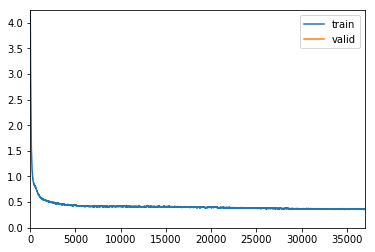

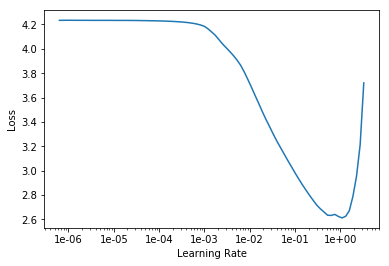

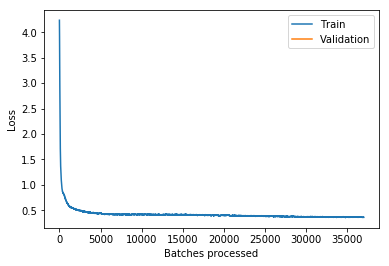

In [27]:
learn = language_model_learner(data_lm,  drop_mult=1.8, callback_fns=ShowGraph, nl = 1, nh = 400)
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.recorder.plot_losses()
learn.save('fit-head')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


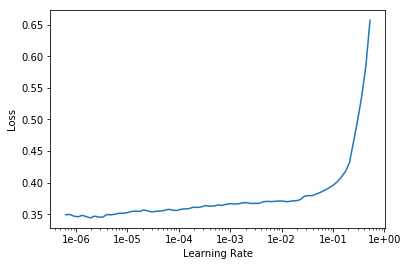

In [28]:
learn.load('fit-head')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy
1,0.391129,0.365233,0.854589
2,0.354026,0.340970,0.861960


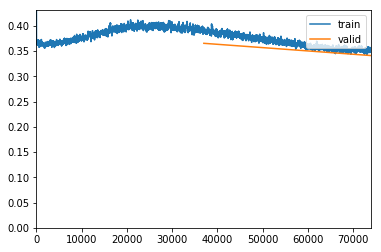

In [29]:
learn.fit_one_cycle(2, .01, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.388355,0.357520,0.855700
2,0.388488,0.365851,0.857172
3,0.351390,0.340428,0.860833
4,0.344012,0.331921,0.864013


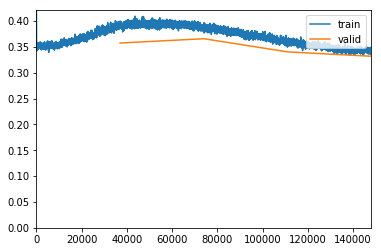

In [30]:
learn.fit_one_cycle(4, .01, moms=(0.8,0.7))

In [32]:
learn.save_encoder('fine_tuned_enc3')

In [33]:
df = walks.sample(frac=1).reset_index(drop=True)
df['index1']=df.index

g = df.groupby('component')
df['RN'] = g['index1'].rank(method='min')

df[df['component']==1].head()


,walk,label,start_node,component,index1,RN
799,43 56 0 50 63 70 39 43 56 0 50 64 70 39 43 56 ...,0,41,1,799,1.0
2450,43 56 0 50 64 70 39 43 56 0 50 64 70 39 43 56 ...,0,45,1,2450,2.0
3134,43 61 0 50 64 70 40 43 61 0 50 63 70 39 43 61 ...,0,9,1,3134,3.0
3260,43 58 0 50 65 70 39 43 58 0 50 63 70 39 47 58 ...,0,1,1,3260,4.0
4426,43 56 0 50 63 70 39 43 56 0 50 64 70 39 43 56 ...,0,41,1,4426,5.0


Choose a path per node and concatenate for entire component

In [34]:
df.groupby('component')['walk'].apply(lambda x: ', '.join(x))

def f(x):
     return Series(dict(label = x['label'].min(), text =  ', '.join(x['walk'])))
df_text_comp = df[(df['RN']<=8.0)].groupby('component').apply(f)
df_text_comp.head()

,label,text
component,,
1,0,43 56 0 50 63 70 39 43 56 0 50 64 70 39 43 56 ...
2,1,47 60 1 50 64 75 40 43 60 0 50 64 73 39 43 56 ...
3,1,45 60 2 50 64 75 40 43 60 0 50 64 75 39 43 60 ...
4,1,43 56 0 50 64 72 40 43 56 0 50 63 73 39 45 56 ...
5,0,45 56 2 50 63 74 40 43 56 0 50 63 71 40 45 56 ...


In [35]:
df_text_comp['component']= df_text_comp.index
df_text_comp.index.names = ['index']
df_text_comp.head()

,label,text,component
index,,,
1,0,43 56 0 50 63 70 39 43 56 0 50 64 70 39 43 56 ...,1
2,1,47 60 1 50 64 75 40 43 60 0 50 64 73 39 43 56 ...,2
3,1,45 60 2 50 64 75 40 43 60 0 50 64 75 39 43 60 ...,3
4,1,43 56 0 50 64 72 40 43 56 0 50 63 73 39 45 56 ...,4
5,0,45 56 2 50 63 74 40 43 56 0 50 63 71 40 45 56 ...,5


In [36]:
train = pd.merge(df_text_comp, train_tmp, on='component', sort=False)
test =  pd.merge(df_text_comp, test_tmp, on='component', sort=False)
val =  pd.merge(df_text_comp, val_tmp, on='component', sort=False)
(train.shape,val.shape, test.shape, train.shape[0]/df_text_comp.shape[0])

((1280, 3), (320, 3), (400, 3), 0.64)

In [38]:
bs=32#48

data_clas = TextClasDataBunch.from_df(train_df=train[['text','label']],valid_df=val[['text','label']],  path=mypath, text_cols='text',label_cols = 'label', vocab=data_lm.vocab)


In [39]:
data_clas.save('tmp_clas')

In [40]:
data_clas = TextClasDataBunch.load(mypath, 'tmp_clas', bs=bs)

In [41]:
data_clas.show_batch()

text,target
xxbos 43 56 0 50 63 73 39 47 56 1 50 63 71 39 43 60 0 50 63 71 39 43 60 0 50 63 71 39 43 60 0 50 63 71 39 43 60 0 50 63 71 39 43 56 0 50 64 72 39 43 60 0 50 63 71 39 43 56 0 50 64 72 39 43 56 0 50 63 73,1
xxbos 43 56 0 50 64 71 39 43 56 0 50 63 71 39 43 60 0 50 64 72 39 43 60 0 50 63 75 39 43 60 0 50 64 72 39 43 56 0 50 63 71 39 43 56 0 50 64 71 39 43 56 0 50 63 71 39 43 60 0 50 64 72 39 43 60 0 50 63 71,1
xxbos 47 60 1 50 64 75 39 43 60 0 50 64 75 39 43 60 0 50 64 72 39 43 60 0 50 64 75 39 47 60 1 50 64 75 39 43 60 0 50 64 75 39 47 60 1 50 64 75 39 43 60 0 50 64 75 39 43 60 0 50 64 72 39 43 56 0 50 64 72,1
xxbos 43 60 0 50 64 71 39 45 60 5 50 64 71 40 47 56 1 50 64 74 40 45 60 5 50 64 71 40 47 56 1 50 64 74 40 45 60 5 50 64 71 40 47 60 1 50 64 74 40 45 60 5 50 64 71 39 43 60 0 50 64 71 39 45 60 5 50 64 71,0
xxbos 43 56 0 50 63 75 39 45 56 2 50 63 73 39 43 56 0 50 63 72 39 45 56 2 50 63 73 39 43 56 0 50 63 75 39 45 56 2 50 63 73 39 43 56 0 50 63 72 39 45 56 2 50 63 73 39 43 56 0 50 63 72 39 45 56 2 50 63 73,1


In [44]:
learn = text_classifier_learner(data_clas, drop_mult=1.7, nl = 1, nh = 400)
learn.load_encoder('fine_tuned_enc3')
learn.freeze()

In [45]:
gc.collect()

4813

In [46]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


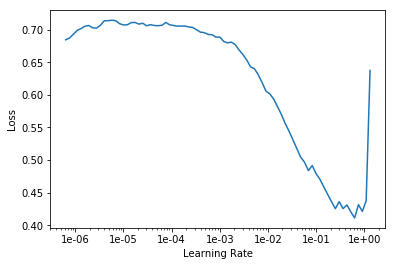

In [47]:
learn.recorder.plot()

In [48]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.142388,0.558656,0.668750


In [49]:
def predict(test,learn):
  predictions=[]
  for index, row in test.iterrows():
    p=learn.predict(row['text'])
    #print((row['label'],str(p[0])))
    predictions.append((row['text'],str(row['label']),str(p[0])))
  dfpred = pd.DataFrame(predictions)
  dfpred.columns=['text','label','prediction']
  match=dfpred[(dfpred['label']==dfpred['prediction'])]
  #match.head()
  print((dfpred.shape[0], match.shape[0],match.shape[0]/dfpred.shape[0]))

In [50]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.132335,0.057097,0.990625


In [51]:
predict(test,learn)

(400, 400, 1.0)


In [52]:
learn.unfreeze()
learn.fit_one_cycle(8, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.083011,0.055950,0.993750
2,0.088997,0.052415,0.993750
3,0.091001,0.042912,0.990625
4,0.083899,0.057952,0.993750
5,0.050148,0.047976,0.993750
6,0.073039,0.045649,0.993750
7,0.054214,0.050002,0.993750
8,0.062679,0.050021,0.993750


In [53]:
predict(test,learn)

(400, 400, 1.0)


In [54]:
learn.save('final')